<a href="https://colab.research.google.com/github/manishhr/stroke_prediction/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving healthcare-dataset-stroke-data (1).csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
import numpy as np 
import pandas as pd
raw_data = pd.read_csv('/content/healthcare-dataset-stroke-data (1).csv')
raw_data = raw_data.dropna(axis=0).reset_index(drop=True)
raw_data = raw_data.drop(raw_data[raw_data['gender'] == 'Other'].index , axis=0).reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
data_pre = raw_data.copy()
le = LabelEncoder()
data_pre['gender'] = le.fit_transform(data_pre['gender'])
data_pre['ever_married'] = le.fit_transform(data_pre['ever_married'])
data_pre['work_type'] = le.fit_transform(data_pre['work_type'])
data_pre['Residence_type'] = le.fit_transform(data_pre['Residence_type'])
data_pre['smoking_status'] = le.fit_transform(data_pre['smoking_status'])
x1 = data_pre[['hypertension', 'smoking_status', 'heart_disease', 'bmi', 'avg_glucose_level']] 
y = data_pre['stroke']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state=334)
knn = KNeighborsClassifier(n_neighbors=5)
smote=SMOTE()
x_tr_smote,y_tr_smote=smote.fit_resample(X_train,y_train)
result=knn.fit(x_tr_smote, y_tr_smote)
result.score(X_test,y_test)

0.7393075356415478

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
table_predict = pd.DataFrame()
table_predict['actual'] = y_test
table_predict['predict'] = np.round(result.predict(X_test))
cm = confusion_matrix(table_predict['actual'], table_predict['predict'])
print(cm)
accuracy = accuracy_score(table_predict['actual'], table_predict['predict'])
print(accuracy)
print('Accuracy The Model :', np.round(accuracy, 2) * 100, '%')

[[719 234]
 [ 22   7]]
0.7393075356415478
Accuracy The Model : 74.0 %


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
cm = confusion_matrix(table_predict['actual'], table_predict['predict'])
print(cm)
precision = precision_score(table_predict['actual'], table_predict['predict'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(table_predict['actual'], table_predict['predict'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(table_predict['actual'], table_predict['predict'])
print('F1 score: %f' % f1)

[[719 234]
 [ 22   7]]
Precision: 0.029046
Recall: 0.241379
F1 score: 0.051852


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob=knn.predict_proba(X_test)
yb_probs=y_prob[:,1]
r_auc=roc_auc_score(y_test,yb_probs)
r_fpr,r_tpr,_=roc_curve(y_test,yb_probs,pos_label=1)

Text(0, 0.5, 'true positive rate')

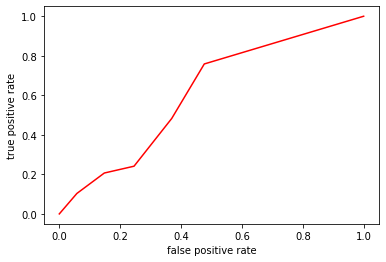

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_fpr,r_tpr,color="red")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")